In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [2]:
Salary_Train = pd.read_csv('D:/DS Assignments/Naive Byes/SalaryData_Train.csv')

In [3]:
Salary_Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
Salary_Test= pd.read_csv('D:/DS Assignments/Naive Byes/SalaryData_Test.csv')

In [5]:
Salary_Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
Salary_Train.shape

(30161, 14)

In [7]:
Salary_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_name = label_encoder.fit(Salary_Train['workclass'])
Salary_Train['workclass'] = encoded_name.transform(Salary_Train['workclass'])
encoded_name = label_encoder.fit(Salary_Train['education'])
Salary_Train['education'] = encoded_name.transform(Salary_Train['education'])
encoded_name = label_encoder.fit(Salary_Train['maritalstatus'])
Salary_Train['maritalstatus'] = encoded_name.transform(Salary_Train['maritalstatus'])
encoded_name = label_encoder.fit(Salary_Train['occupation'])
Salary_Train['occupation'] = encoded_name.transform(Salary_Train['occupation'])
encoded_name = label_encoder.fit(Salary_Train['relationship'])
Salary_Train['relationship'] = encoded_name.transform(Salary_Train['relationship'])
encoded_name = label_encoder.fit(Salary_Train['race'])
Salary_Train['race'] = encoded_name.transform(Salary_Train['race'])
encoded_name = label_encoder.fit(Salary_Train['sex'])
Salary_Train['sex'] = encoded_name.transform(Salary_Train['sex'])
encoded_name = label_encoder.fit(Salary_Train['native'])
Salary_Train['native'] = encoded_name.transform(Salary_Train['native'])
encoded_name = label_encoder.fit(Salary_Train['Salary'])
Salary_Train['Salary'] = encoded_name.transform(Salary_Train['Salary'])
Salary_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_name = label_encoder.fit(Salary_Test['workclass'])
Salary_Test['workclass'] = encoded_name.transform(Salary_Test['workclass'])
encoded_name = label_encoder.fit(Salary_Test['education'])
Salary_Test['education'] = encoded_name.transform(Salary_Test['education'])
encoded_name = label_encoder.fit(Salary_Test['maritalstatus'])
Salary_Test['maritalstatus'] = encoded_name.transform(Salary_Test['maritalstatus'])
encoded_name = label_encoder.fit(Salary_Test['occupation'])
Salary_Test['occupation'] = encoded_name.transform(Salary_Test['occupation'])
encoded_name = label_encoder.fit(Salary_Test['relationship'])
Salary_Test['relationship'] = encoded_name.transform(Salary_Test['relationship'])
encoded_name = label_encoder.fit(Salary_Test['race'])
Salary_Test['race'] = encoded_name.transform(Salary_Test['race'])
encoded_name = label_encoder.fit(Salary_Test['sex'])
Salary_Test['sex'] = encoded_name.transform(Salary_Test['sex'])
encoded_name = label_encoder.fit(Salary_Test['native'])
Salary_Test['native'] = encoded_name.transform(Salary_Test['native'])
encoded_name = label_encoder.fit(Salary_Test['Salary'])
Salary_Test['Salary'] = encoded_name.transform(Salary_Test['Salary'])
Salary_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [10]:
X_train = Salary_Train.iloc[:, :13].values

In [11]:
X_train.shape

(30161, 13)

In [12]:
y_train = Salary_Train.iloc[:,13].values

In [13]:
y_train.shape

(30161,)

In [14]:
X_test = Salary_Test.iloc[:, :13].values

In [15]:
X_test.shape

(15060, 13)

In [16]:
y_test = Salary_Test.iloc[:,13].values

In [17]:
y_test.shape

(15060,)

In [19]:
from sklearn.naive_bayes import MultinomialNB as MB
# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)
train_pred_m = classifier_mb.predict(X_train)
accuracy_train_m = np.mean(train_pred_m==y_train)

In [20]:
accuracy_train_m

0.7729186698053778

In [21]:
test_pred_m = classifier_mb.predict(X_test)
accuracy_test_m = np.mean(test_pred_m==y_test)

In [22]:
accuracy_test_m

0.7749667994687915

In [28]:
confusion_matrix(y_test,test_pred_m) 
pd.crosstab(y_test.flatten(),test_pred_m) 

col_0,0,1
row_0,,
0,10891,469
1,2920,780


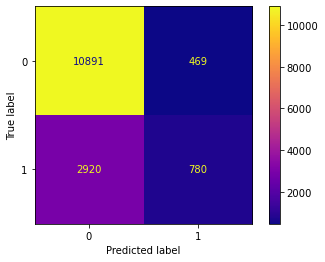

In [29]:
plot_confusion_matrix(classifier_mb, X_test, y_test, cmap="plasma")

In [37]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_m))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [23]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)
train_pred_g = classifier_gb.predict(X_train)
accuracy_train_g = np.mean(train_pred_g==y_train)

In [24]:
accuracy_train_g

0.7953317197705646

In [25]:
test_pred_g = classifier_gb.predict(X_test)
accuracy_test_g = np.mean(test_pred_g==y_test)

In [26]:
accuracy_test_g

0.7946879150066402

In [35]:
confusion_matrix(y_test,test_pred_g) 
pd.crosstab(y_test.flatten(),test_pred_g) 

col_0,0,1
row_0,,
0,10759,601
1,2491,1209


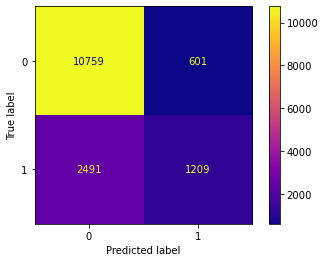

In [36]:
plot_confusion_matrix(classifier_gb, X_test, y_test, cmap="plasma")

In [38]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_g))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060

